In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import preprocessing

In [22]:
users = pd.read_pickle('users.pkl')

In [23]:
users.columns

Index(['Cat', 'bot', 'crawled_at', 'created_at', 'default_profile',
       'description', 'geo_enabled', 'id', 'lang', 'listed_count', 'location',
       'name', 'profile_background_color', 'profile_background_image_url',
       'profile_background_image_url_https', 'profile_background_tile',
       'profile_banner_url', 'profile_image_url', 'profile_image_url_https',
       'profile_link_color', 'profile_sidebar_border_color',
       'profile_sidebar_fill_color', 'profile_text_color',
       'profile_use_background_image', 'screen_name', 'time_zone', 'timestamp',
       'updated', 'url', 'utc_offset', 'tweet_count', 'favs_tiempo',
       'followers_tiempo', 'statuses_tiempo', 'friends_tiempo'],
      dtype='object')

In [24]:
# Eliminar columnas no utilizables
users = users[['Cat','bot','default_profile', 'description', 'geo_enabled', 'lang', 'listed_count', 'location', 'name', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_banner_url', 'profile_image_url', 'profile_image_url_https', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'screen_name', 'url','favs_tiempo','followers_tiempo', 'statuses_tiempo','friends_tiempo']]

In [46]:
# Generar eje X de features y Normalizarlo
X = users.drop(columns=['Cat','bot'])
atributos = X.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [26]:
# Generar eje Y de targets y encodear las etiquetas
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y =  le.fit_transform(users['bot'])
y

array([1, 1, 1, ..., 0, 0, 0])

In [27]:
# Separar entre train y test
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [28]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_trees = {'n_estimators': [50, 100, 200], 
               'max_features': [1, 5, 8, 10, 21], 
               'max_depth': [5, 20, 50, 70, 100], 
               'min_samples_leaf':[1, 5, 8, 10, 50]}

In [29]:
rf = RandomForestClassifier(class_weight='balanced')
kf = StratifiedKFold(n_splits=3, shuffle=True)

In [30]:
grid_search_rf = GridSearchCV(rf, param_grid=param_trees, cv=kf, verbose=1, n_jobs=-1)

In [31]:
grid_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 375 candidates, totalling 1125 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1125 out of 1125 | elapsed:  3.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [50, 100, 200], 'max_features': [1, 5, 8, 10, 21], 'max_depth': [5, 20, 50, 70, 100], 'min_samples_leaf': [1, 5, 8, 10, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [32]:
model = grid_search_rf.best_estimator_

In [33]:
grid_search_rf.best_score_

0.9868772241992882

In [34]:
# Predecir valores de test
y_pred = model.predict(X_test)

In [35]:
# Calculamos el accuracy general del modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9853235490326885

In [36]:
# Matriz de confusión
confusion_matrix(y_test, y_pred)

array([[ 260,    6],
       [  16, 1217]])

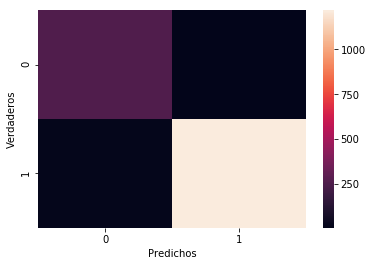

In [37]:
# Heatmap
sns.heatmap(confusion_matrix(y_test, y_pred))
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [38]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.94      0.98      0.96       266
          1       1.00      0.99      0.99      1233

avg / total       0.99      0.99      0.99      1499



In [39]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred,average='weighted')

0.9853235490326885

In [40]:
model.feature_importances_

array([1.92579422e-03, 0.00000000e+00, 1.98201165e-02, 0.00000000e+00,
       5.95535432e-03, 1.31990542e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.29966951e-04, 1.08296200e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.75666605e-04, 0.00000000e+00,
       6.98564732e-04, 8.10820395e-01, 8.36771917e-03, 1.98236331e-02,
       2.18666847e-02])

In [48]:
# Visualizar el árbol usando graphviz
dot_data = export_graphviz(model, out_file=None,  
                feature_names=atributos,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [49]:
# Calcular la importancia de los atributos
pd.DataFrame({'Atributo':atributos,
              'importancia':model.feature_importances_}).sort_values('importancia',
                                                                      ascending=False)

,Atributo,importancia
21,favs_tiempo,0.810820
11,profile_banner_url,0.108296
24,friends_tiempo,0.021867
23,statuses_tiempo,0.019824
2,geo_enabled,0.019820
22,followers_tiempo,0.008368
4,listed_count,0.005955
0,default_profile,0.001926
5,location,0.001320
20,url,0.000699
